# Regularization
---
## 1. Regularization과 Normalization 개념 차이


#### 1-1. Regularization
**정칙화**라고 불리며, 오버피팅(overfitting)을 해결하기 위한 방법 중 하나 // Overfitting: train set은 매우 잘 맞히지만, validation/test set은 맞히지 못하는 현상
* L1, L2 Regularization, Dropout, Batch normalization 등이 있음<br><br>


#### 1-2. Normalization
**정규화**라고 불리며, 이는 데이터의 형태를 좀 더 의미 있게, 혹은 트레이닝에 적합하게 전처리하는 과정
* 데이터를 z-score로 바꾸거나 minmax scaler를 사용하여 0과 1사이의 값으로 분포를 조정하는 것들이 해당(**scaling**)
---

#### 1-3. Iris dataset을 이용한 Regularization과 Normalization 비교(회귀 문제)<br>


###  데이터 호출

In [2]:
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

In [3]:
# 0, 1, 2로 되어있는 target 데이터를 
# 알아보기 쉽게 'setosa', 'versicolor', 'virginica'로 바꿈
def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'virginica'

target_df['species'] = target_df['species'].apply(converter)

iris_df = pd.concat([iris_df, target_df], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# virginica라는 종의 petal length(꽃잎 길이)를 X, sepal length(꽃받침의 길이)를 Y로 두고 print할 것

X = [iris_df['petal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']
Y = [iris_df['sepal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']

print(X)
print(Y)

[6.0, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5.0, 5.1, 5.3, 5.5, 6.7, 6.9, 5.0, 5.7, 4.9, 6.7, 4.9, 5.7, 6.0, 4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5.0, 5.2, 5.4, 5.1]
[6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]


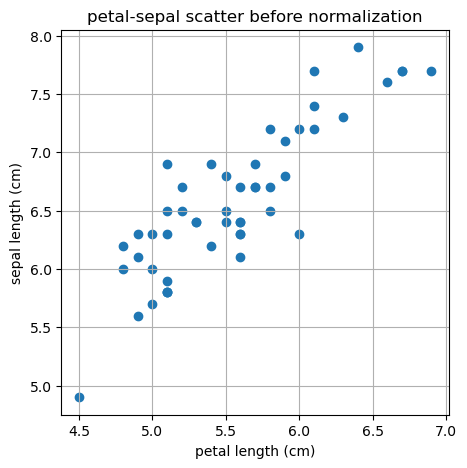

In [7]:
# 더 보기 쉽게 산점도로 시각화

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.title('petal-sepal scatter before normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

### a. 데이터 전처리 : Normalization
#### 0-1 사이의 값으로 만들어 주는 minmax_scale 적용
**! scale이 바뀌는 것을 유의 깊게 관찰**

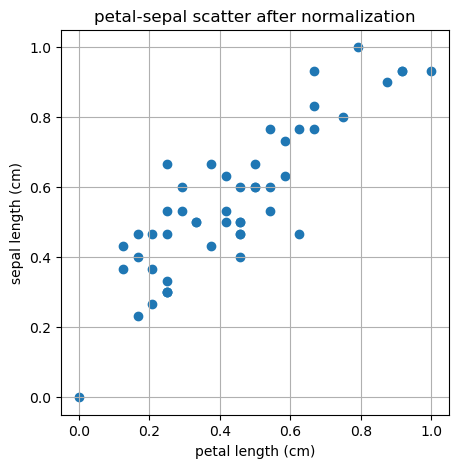

In [8]:
from sklearn.preprocessing import minmax_scale

X_scale = minmax_scale(X) #minmax로 스케일링해줌
Y_scale = minmax_scale(Y)

plt.figure(figsize=(5,5))
plt.scatter(X_scale,Y_scale)
plt.title('petal-sepal scatter after normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

### b. overfitting을 방지하기 위해 Regularization을 적용
#### sklearn.linear_model에 포함된 LinearRegression 모델을 사용하여 X-Y 관계를 선형으로 모델링.
**! 이 sklearn.linear_model에는 L1, L2 Regression인 Lasso와 Ridge 모델도 함께 포함되어 있음**

In [9]:
from sklearn.linear_model import LinearRegression
import numpy as np 

X = np.array(X)
Y = np.array(Y)

# Iris Dataset을 Linear Regression으로 학습합니다. 
linear= LinearRegression()
linear.fit(X.reshape(-1,1), Y)

# Linear Regression의 기울기와 절편을 확인합니다. 
a, b=linear.coef_, linear.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

기울기 : 1.00, 절편 : 1.06


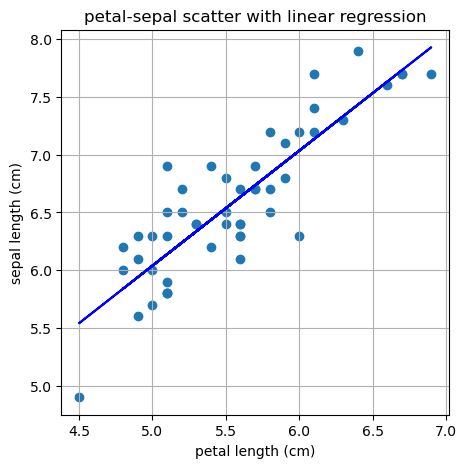

In [10]:
# 시각화

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,linear.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with linear regression') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

#### L1, L2 Regularization으로 Regression을 적용(Lasso, Ridge)

기울기 : 0.00, 절편 : 6.59


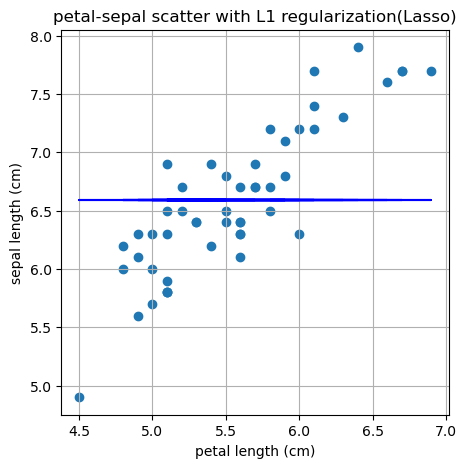

In [11]:
#L1 regularization은 Lasso로 import.
from sklearn.linear_model import Lasso

L1 = Lasso() #정규화(L1)
L1.fit(X.reshape(-1,1), Y)
a, b=L1.coef_, L1.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L1.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with L1 regularization(Lasso)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

Lasso는 문제를 제대로 풀어내지 못함 (X가 1차원 값인 선형회귀분석에서 미분을 적용하면 0이 되어버리기 때문)

기울기 : 0.93, 절편 : 1.41


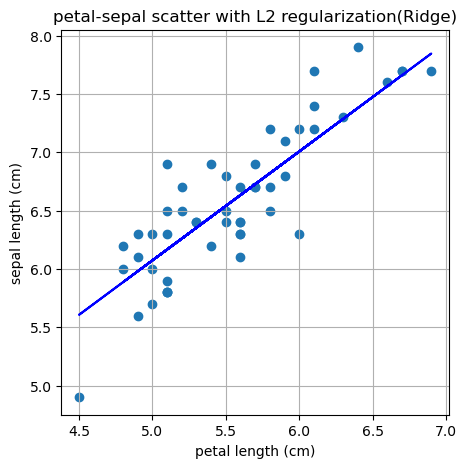

In [12]:
#L2 regularization은 Ridge로 import 합니다. 
from sklearn.linear_model import Ridge

L2 = Ridge()
L2.fit(X.reshape(-1,1), Y)
a, b = L2.coef_, L2.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L2.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with L2 regularization(Ridge)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

---

## 2. L1 Regularization과 L2 Regularization의 차이

### 2-1. Lp norm
$
\begin{align}
L_p & := (\sum_i^n |x_i|^p)^{1/p}
\end{align}
$

#### 적용 예제

In [20]:
x=np.array([1,10,1,1,1])
p=2
norm_x=np.linalg.norm(x, ord=p)
making_norm = (sum(x**p))**(1/p)
print("result of numpy package norm function : %0.5f "%norm_x) 
print("result of making norm : %0.5f "%making_norm)

result of numpy package norm function : 10.19804 
result of making norm : 10.19804 


#### p=∞ 인 Infinity norm의 경우는 가장 큰 숫자를 출력한다.


${||x||}_{∞}:=max(x)$

In [21]:
norm_x=np.linalg.norm(x, ord=np.inf)
print("result of infinite norm : %0.5f "%norm_x)

result of infinite norm : 10.00000 


#### 행렬의 norm은 p=1에서 컬럼의 합이 제일 큰 값이 출력되고, p=∞인 경우 로우의 합이 가장 큰 값이 출력 된다.

In [22]:
A=np.array([[1,2,3],[1,2,3],[4,6,8]])
inf_norm_A=np.linalg.norm(A, ord=np.inf)
print("result inf norm of A :", inf_norm_A)
one_norm_A=np.linalg.norm(A, ord=1)
print("result one norm of A :", one_norm_A)

result inf norm of A : 18.0
result one norm of A : 14.0


---
<br>


### 2-2. L1 regularization (Lasso)의 정의

$
\hat{\beta}^{lasso} := argmin\frac{1}{2N}\sum_i^N{({y_i}-{\beta}_0-\sum_{j=1}^px_{ij}{\beta}_j)^2} + \lambda\sum_{j=1}^p|\beta_j|
$

($\beta_{0}$은 절편, $\beta_{1}$은 기울기)



**중요하게 봐야 할 부분은 $\lambda\sum_{j=1}^p|\beta_j|$으로 이 부분이 없다면 Linear Regression과 동일**

<br>



### 2-3.  위 Iris 데이터셋에서 Lasso가 제대로 작동하지 않은 이유
X가 petal length, Y가 sepal length로 하여, N=50, p=1인 선형 회귀를 적용하였음.



>$$
\hat{\beta}^{lasso} := argmin_{\beta}\frac{1}{2N}\sum_i^N{({y_i}-{\beta}_0-\sum_{j=1}^px_{ij}{\beta}_j)^2} + \lambda\sum_{j=1}^p|\beta_j|
$$


#### * 위 식을 기울기 $\beta_{1}$에 대해 미분을 하게 되면


$$
0 = \frac{1}{N}\sum_i^N{x_i({y_i}-{\beta}_0-\sum_{j=1}^px_{ij}{\beta}_j)} + \lambda
$$


값이 남는다. 이를 정리하면


$$
\beta_{1} = {\beta_{0}\bar{x}+\bar{xy}+\lambda}\over {\bar{x^2}}
$$



일 때 최적의 값을 갖는 것을 알 수 있다.<br><br>

  
  
#### * 하지만 같은 방법으로 $\beta_{0}$에 대해 미분을 하게 되면


$$
0 = \frac{1}{N}\sum_i^N{({y_i}-{\beta}_0-\sum_{j=1}^px_{ij}{\beta}_j)}
$$


값이 남는다. 이를 정리하면


$$
\beta_{0} = \bar{y}+\bar{x}\beta_1
$$


로 $\lambda$가 사라진 값을 가지게 된다. 즉 Regulation을 적용한 효과를 볼 수 없다.


#### **! L1 Regularization을 사용할 때는 X가 2차원 이상인 여러 컬럼 값이 있는 데이터일 때 실제 효과를 볼 수 있다.**<br><br>

### 2-4. 여러 컬럼을 갖는 데이터에 L1 Regulation(Lasso)를 적용 : wine dataset
#### 데이터 불러오기

In [6]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_wine

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target_df = pd.DataFrame(data=wine.target, columns=['Y'])

In [7]:
# 데이터 확인

wine_df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [8]:
target_df.head(5)

,Y
0,0
1,0
2,0
3,0
4,0


#### Linear regression 모델을 적용

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 데이터를 준비하고
X_train, X_test, y_train, y_test = train_test_split(wine_df, target_df, test_size=0.3, random_state=101)

# 모델을 훈련시킵니다.
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트를 해볼까요?
model.predict(X_test)
pred = model.predict(X_test)

# 테스트 결과는 이렇습니다!
print("result of linear regression")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient linear regression")
print(model.coef_)

result of linear regression
Mean Absolute Error: 0.25128973939722726
Mean Squared Error: 0.10624587409525657
Mean Root Squared Error: 0.32595379134971963


 coefficient linear regression
[[-8.09017190e-02  4.34817880e-02 -1.18857931e-01  3.65705449e-02
  -4.68014203e-04  1.41423581e-01 -4.54107854e-01 -5.13172664e-01
   9.69318443e-02  5.34311136e-02 -1.27626604e-01 -2.91381844e-01
  -5.72238959e-04]]


#### 이번에는 L1 regulation을 적용

In [10]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 모델을 준비하고 훈련시킵니다.
L1 = Lasso(alpha=0.05)
L1.fit(X_train, y_train)

# 테스트를 해봅시다.
pred = L1.predict(X_test)

# 모델 성능은 얼마나 좋을까요?
print("result of Lasso")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Lasso")
print(L1.coef_)

result of Lasso
Mean Absolute Error: 0.24233731936122138
Mean Squared Error: 0.09559568945781889
Mean Root Squared Error: 0.3091855259513597


 coefficient of Lasso
[-0.          0.01373795 -0.          0.03065716  0.00154719 -0.
 -0.34143614 -0.          0.          0.06755943 -0.         -0.14558153
 -0.00089635]


#### 비교

Linear Regression에서는 모든 컬럼의 가중치를 탐색하여 구하는 반면, L1 Regularization에서는 총 13개 중 7개를 제외한 나머지의 값들이 모두 0임을 확인할 수 있음<br>
**Error 부분에서는 큰 차이가 없었지만, 우리가 어떤 컬럼이 결과에 영향을 더 크게 미치는지 확실히 확인할 수 있음**

---

### 2-5. L2 regularization (Ridge)의 정의

>$$
\hat{\beta}^{ridge} := argmin_{\beta}\frac{1}{2N}\sum_i^N{({y_i}-{\beta}_0-\sum_{j=1}^px_{ij}{\beta}_j)^2} + \lambda\sum_{j=1}^p{\beta_j}^2
$$

**Lp norm 부분만 차이가 있음**
<br><br>



### 2-6. 차이점

![L1/L2 Regularization 차이점](lasso_ridge.png)
* L1 Regularizaion(Lasso)는 $|\beta|$를 이용하여 마름모 형태의 제약조건이 생김. 그리고 위의 등고선처럼 보이는 내용이 바로 풀어야 하는 문제로, 이 문제가 제약조건과 만나는 지점이 해가 되는 것. 그래서 L1 Regularization에서는 몇 개의 축에서 $\beta$값을 0으로 보냄.

* L2 regularization은 $\beta^2$이므로 제약조건이 원의 형태로 나타남. 그러므로 0에 가지는 않고 0에 가깝게 감을 확인할 수 있음. 또한 제곱이 들어가 있기 때문에 절댓값으로 L1 Norm을 쓰는 Lasso보다는 수렴이 빠르다는 장점을 가짐.<br><br>

### 2-7. L2 Regularization(Ridge) 적용 : wine dataset
** 학습이 굉장히 쉽고 overfitting이 발생하지 않는 데이터셋**


#### 데이터 불러오기

In [12]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target_df = pd.DataFrame(data=wine.target, columns=['Y'])
X_train, X_test, y_train, y_test = train_test_split(wine_df, target_df, test_size= 0.3, random_state=101)

#### 비교를 위해 Lasso부터 적용

In [13]:
from sklearn.linear_model import Lasso

L1 = Lasso(alpha=0.05, max_iter=5)
L1.fit(X_train, y_train)
pred = L1.predict(X_test)

print("result of Lasso")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Lasso")
print(L1.coef_)

result of Lasso
Mean Absolute Error: 0.2484576884176944
Mean Squared Error: 0.1026298911034127
Mean Root Squared Error: 0.32035900346862844


 coefficient of Lasso
[-0.          0.         -0.          0.03295564  0.00109495  0.
 -0.4027847   0.          0.          0.06023131 -0.         -0.12001119
 -0.00078971]


/Users/jsj/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.924e+00, tolerance: 7.480e-03
  model = cd_fast.enet_coordinate_descent(


#### 같은 제약조건으로 Ridge 적용

In [14]:
from sklearn.linear_model import Ridge

L2 = Ridge(alpha=0.05,max_iter=5)
L2.fit(X_train, y_train)
pred = L2.predict(X_test)

print("result of Ridge")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Ridge")
print(L2.coef_)

result of Ridge
Mean Absolute Error: 0.25114669599364287
Mean Squared Error: 0.10568076460795572
Mean Root Squared Error: 0.3250857803841253


 coefficient of Ridge
[[-8.12456257e-02  4.35541496e-02 -1.21661565e-01  3.65979773e-02
  -3.94014013e-04  1.39168707e-01 -4.50691113e-01 -4.87216747e-01
   9.54111059e-02  5.37077039e-02 -1.28602933e-01 -2.89832790e-01
  -5.73136185e-04]]


#### Literation 값을 5로만 설정해 보아도, L2 Regularization의 문제는 Linear Regression과 같은 값이 나오지만, L1 Regularization에서는 앞 step과 같은 값을 확인할 수는 없음.. 심지어 수렴하지 않았다는 경고까지 나옴.<br><br>


### 정리하면, L1 Regularization은 가중치가 적은 벡터에 해당하는 계수를 0으로 보내면서 차원 축소와 비슷한 역할을 하는 것이 특징이며,
### L2 Regularization은 0이 아닌 0에 가깝게 보내지만 제곱 텀이 있기 때문에 L1 Regularization보다는 수렴 속도가 빠르다는 장점이 있다.

---

## 3. Dropout



### 3-1. fasion mnist 데이터셋에 Dropout을 적용
#### 데이터 불러오기

In [24]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

fashion_mnist = keras.datasets.fashion_mnist

In [25]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

4422102/4422102 [==============================] - 0s 0us/step


#### 모델 설계 및 학습(Dropout 확률은 0.9로 설정)

In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    # 여기에 dropout layer를 추가해보았습니다. 나머지 layer는 아래의 실습과 같습니다.
    keras.layers.Dropout(0.9),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(train_images, train_labels, epochs=5)

Metal device set to: Apple M2
Epoch 1/5


2022-09-18 20:18:35.473856: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-18 20:18:35.474037: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-09-18 20:18:35.674949: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-18 20:18:35.782715: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 8s 4ms/step - loss: 1.1144 - accuracy: 0.5749
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8344 - accuracy: 0.6773
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7807 - accuracy: 0.6969
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7410 - accuracy: 0.7149
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7093 - accuracy: 0.7237


#### 비교를 위해 dropout이 없는 모델을 실험

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    # 이번에는 dropout layer가 없습니다. 
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
  46/1875 [..............................] - ETA: 6s - loss: 1.2267 - accuracy: 0.5836

2022-09-18 20:19:26.861575: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 6s 3ms/step - loss: 0.4984 - accuracy: 0.8261
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3759 - accuracy: 0.8648
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3366 - accuracy: 0.8774
Epoch 4/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3145 - accuracy: 0.8850
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2950 - accuracy: 0.8911


#### dropout을 적용한 것이 오히려 학습이 잘 안 되는 것을 볼 수 있음. overfitting이 일어나는 학습이 아니었기 때문<br><br>

### 3-2. overfitting이 되는 환경을 만들어서 결과를 비교
**overfitting이 되게 하기 위해 의도적으로 train set을 99%로 늘리고 validation set을 줄일 것**<br><br>



#### 비교를 위해 우선 Dropout이 없는 모델을 적용

In [28]:
X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.01, random_state=101)
X_train = X_train / 255.0
X_valid = X_valid / 255.0

#Dense layer만으로 만들어 낸 classification 모델입니다.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=200, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/200


2022-09-18 20:23:18.804742: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


117/117 [==============================] - 1s 8ms/step - loss: 2.0585 - accuracy: 0.5319 - val_loss: 1.6580 - val_accuracy: 0.6167
Epoch 2/200
 11/117 [=>............................] - ETA: 0s - loss: 1.6474 - accuracy: 0.5755

2022-09-18 20:23:19.985544: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


117/117 [==============================] - 1s 5ms/step - loss: 1.4145 - accuracy: 0.6065 - val_loss: 1.1906 - val_accuracy: 0.6750
Epoch 3/200
117/117 [==============================] - 1s 5ms/step - loss: 1.0877 - accuracy: 0.6705 - val_loss: 0.9650 - val_accuracy: 0.7150
Epoch 4/200
117/117 [==============================] - 1s 5ms/step - loss: 0.9045 - accuracy: 0.7153 - val_loss: 0.8272 - val_accuracy: 0.7517
Epoch 5/200
117/117 [==============================] - 1s 5ms/step - loss: 0.7943 - accuracy: 0.7343 - val_loss: 0.7418 - val_accuracy: 0.7583
Epoch 6/200
117/117 [==============================] - 1s 5ms/step - loss: 0.7274 - accuracy: 0.7479 - val_loss: 0.6891 - val_accuracy: 0.7800
Epoch 7/200
117/117 [==============================] - 1s 6ms/step - loss: 0.6837 - accuracy: 0.7584 - val_loss: 0.6547 - val_accuracy: 0.7750
Epoch 8/200
117/117 [==============================] - 1s 6ms/step - loss: 0.6513 - accuracy: 0.7663 - val_loss: 0.6303 - val_accuracy: 0.7900
Epoch 9/200

117/117 [==============================] - 1s 5ms/step - loss: 0.3914 - accuracy: 0.8624 - val_loss: 0.3967 - val_accuracy: 0.8350
Epoch 60/200
117/117 [==============================] - 1s 5ms/step - loss: 0.3898 - accuracy: 0.8630 - val_loss: 0.3939 - val_accuracy: 0.8300
Epoch 61/200
117/117 [==============================] - 1s 5ms/step - loss: 0.3875 - accuracy: 0.8633 - val_loss: 0.3955 - val_accuracy: 0.8267
Epoch 62/200
117/117 [==============================] - 1s 5ms/step - loss: 0.3860 - accuracy: 0.8641 - val_loss: 0.3944 - val_accuracy: 0.8367
Epoch 63/200
117/117 [==============================] - 1s 5ms/step - loss: 0.3851 - accuracy: 0.8644 - val_loss: 0.3909 - val_accuracy: 0.8367
Epoch 64/200
117/117 [==============================] - 1s 5ms/step - loss: 0.3841 - accuracy: 0.8643 - val_loss: 0.3954 - val_accuracy: 0.8350
Epoch 65/200
117/117 [==============================] - 1s 5ms/step - loss: 0.3837 - accuracy: 0.8646 - val_loss: 0.3939 - val_accuracy: 0.8317
Epoch

Epoch 116/200
117/117 [==============================] - 1s 5ms/step - loss: 0.3356 - accuracy: 0.8815 - val_loss: 0.3511 - val_accuracy: 0.8483
Epoch 117/200
117/117 [==============================] - 1s 5ms/step - loss: 0.3354 - accuracy: 0.8818 - val_loss: 0.3555 - val_accuracy: 0.8467
Epoch 118/200
117/117 [==============================] - 1s 5ms/step - loss: 0.3345 - accuracy: 0.8815 - val_loss: 0.3465 - val_accuracy: 0.8483
Epoch 119/200
117/117 [==============================] - 1s 5ms/step - loss: 0.3332 - accuracy: 0.8815 - val_loss: 0.3477 - val_accuracy: 0.8633
Epoch 120/200
117/117 [==============================] - 1s 5ms/step - loss: 0.3326 - accuracy: 0.8827 - val_loss: 0.3496 - val_accuracy: 0.8567
Epoch 121/200
117/117 [==============================] - 1s 5ms/step - loss: 0.3321 - accuracy: 0.8824 - val_loss: 0.3470 - val_accuracy: 0.8567
Epoch 122/200
117/117 [==============================] - 1s 5ms/step - loss: 0.3317 - accuracy: 0.8826 - val_loss: 0.3482 - val_ac

117/117 [==============================] - 1s 5ms/step - loss: 0.3027 - accuracy: 0.8920 - val_loss: 0.3289 - val_accuracy: 0.8717
Epoch 173/200
117/117 [==============================] - 1s 5ms/step - loss: 0.3018 - accuracy: 0.8927 - val_loss: 0.3235 - val_accuracy: 0.8733
Epoch 174/200
117/117 [==============================] - 1s 5ms/step - loss: 0.3016 - accuracy: 0.8929 - val_loss: 0.3282 - val_accuracy: 0.8717
Epoch 175/200
117/117 [==============================] - 1s 5ms/step - loss: 0.3015 - accuracy: 0.8923 - val_loss: 0.3247 - val_accuracy: 0.8733
Epoch 176/200
117/117 [==============================] - 1s 5ms/step - loss: 0.3005 - accuracy: 0.8930 - val_loss: 0.3290 - val_accuracy: 0.8700
Epoch 177/200
117/117 [==============================] - 1s 5ms/step - loss: 0.3014 - accuracy: 0.8920 - val_loss: 0.3319 - val_accuracy: 0.8717
Epoch 178/200
117/117 [==============================] - 1s 5ms/step - loss: 0.3001 - accuracy: 0.8931 - val_loss: 0.3240 - val_accuracy: 0.8750

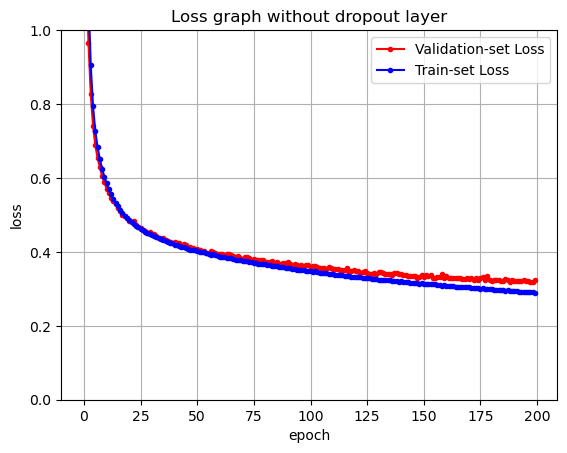

In [29]:
# loss 값을 plot 해보겠습니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.title('Loss graph without dropout layer') 
plt.ylim(0,1)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

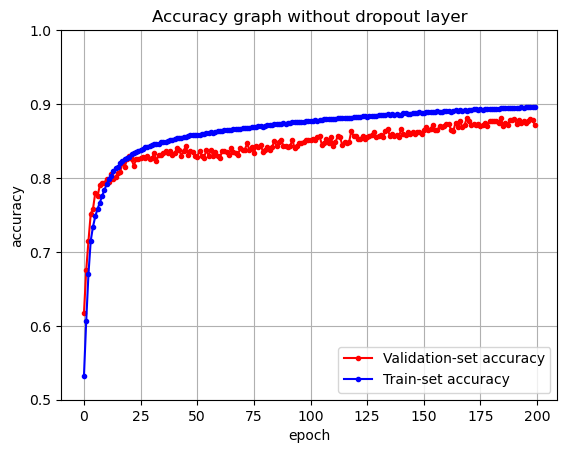

In [30]:
# accuracy 값을 plot 해보겠습니다.
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph without dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

#### Dropout을 적용한 모델

In [31]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    # 여기에 dropout layer를 추가해보았습니다. 나머지 layer는 위의 실습과 같습니다. 
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=200, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/200
 15/117 [==>...........................] - ETA: 0s - loss: 2.2916 - accuracy: 0.1923

2022-09-18 20:27:33.251792: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


117/117 [==============================] - 1s 6ms/step - loss: 2.0851 - accuracy: 0.4568 - val_loss: 1.7075 - val_accuracy: 0.6033
Epoch 2/200
 22/117 [====>.........................] - ETA: 0s - loss: 1.6762 - accuracy: 0.5430

2022-09-18 20:27:34.003131: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


117/117 [==============================] - 1s 5ms/step - loss: 1.4748 - accuracy: 0.5688 - val_loss: 1.2298 - val_accuracy: 0.6617
Epoch 3/200
117/117 [==============================] - 1s 6ms/step - loss: 1.1596 - accuracy: 0.6255 - val_loss: 1.0137 - val_accuracy: 0.7050
Epoch 4/200
117/117 [==============================] - 1s 6ms/step - loss: 0.9933 - accuracy: 0.6711 - val_loss: 0.8812 - val_accuracy: 0.7367
Epoch 5/200
117/117 [==============================] - 1s 5ms/step - loss: 0.8886 - accuracy: 0.6978 - val_loss: 0.7940 - val_accuracy: 0.7500
Epoch 6/200
117/117 [==============================] - 1s 6ms/step - loss: 0.8174 - accuracy: 0.7159 - val_loss: 0.7336 - val_accuracy: 0.7650
Epoch 7/200
117/117 [==============================] - 1s 6ms/step - loss: 0.7702 - accuracy: 0.7279 - val_loss: 0.6964 - val_accuracy: 0.7817
Epoch 8/200
117/117 [==============================] - 1s 6ms/step - loss: 0.7344 - accuracy: 0.7386 - val_loss: 0.6678 - val_accuracy: 0.7783
Epoch 9/200

117/117 [==============================] - 1s 6ms/step - loss: 0.4221 - accuracy: 0.8501 - val_loss: 0.3979 - val_accuracy: 0.8383
Epoch 60/200
117/117 [==============================] - 1s 6ms/step - loss: 0.4209 - accuracy: 0.8510 - val_loss: 0.4006 - val_accuracy: 0.8417
Epoch 61/200
117/117 [==============================] - 1s 5ms/step - loss: 0.4197 - accuracy: 0.8519 - val_loss: 0.4006 - val_accuracy: 0.8467
Epoch 62/200
117/117 [==============================] - 1s 6ms/step - loss: 0.4163 - accuracy: 0.8535 - val_loss: 0.3965 - val_accuracy: 0.8383
Epoch 63/200
117/117 [==============================] - 1s 5ms/step - loss: 0.4179 - accuracy: 0.8512 - val_loss: 0.3939 - val_accuracy: 0.8450
Epoch 64/200
117/117 [==============================] - 1s 5ms/step - loss: 0.4145 - accuracy: 0.8520 - val_loss: 0.3944 - val_accuracy: 0.8400
Epoch 65/200
117/117 [==============================] - 1s 5ms/step - loss: 0.4128 - accuracy: 0.8540 - val_loss: 0.3945 - val_accuracy: 0.8417
Epoch

Epoch 116/200
117/117 [==============================] - 1s 6ms/step - loss: 0.3637 - accuracy: 0.8720 - val_loss: 0.3544 - val_accuracy: 0.8517
Epoch 117/200
117/117 [==============================] - 1s 6ms/step - loss: 0.3647 - accuracy: 0.8710 - val_loss: 0.3524 - val_accuracy: 0.8550
Epoch 118/200
117/117 [==============================] - 1s 6ms/step - loss: 0.3638 - accuracy: 0.8719 - val_loss: 0.3517 - val_accuracy: 0.8517
Epoch 119/200
117/117 [==============================] - 1s 6ms/step - loss: 0.3610 - accuracy: 0.8723 - val_loss: 0.3521 - val_accuracy: 0.8600
Epoch 120/200
117/117 [==============================] - 1s 6ms/step - loss: 0.3615 - accuracy: 0.8733 - val_loss: 0.3514 - val_accuracy: 0.8500
Epoch 121/200
117/117 [==============================] - 1s 6ms/step - loss: 0.3626 - accuracy: 0.8715 - val_loss: 0.3510 - val_accuracy: 0.8550
Epoch 122/200
117/117 [==============================] - 1s 5ms/step - loss: 0.3612 - accuracy: 0.8733 - val_loss: 0.3497 - val_ac

117/117 [==============================] - 1s 6ms/step - loss: 0.3319 - accuracy: 0.8824 - val_loss: 0.3296 - val_accuracy: 0.8667
Epoch 173/200
117/117 [==============================] - 1s 6ms/step - loss: 0.3317 - accuracy: 0.8822 - val_loss: 0.3282 - val_accuracy: 0.8667
Epoch 174/200
117/117 [==============================] - 1s 6ms/step - loss: 0.3324 - accuracy: 0.8816 - val_loss: 0.3285 - val_accuracy: 0.8600
Epoch 175/200
117/117 [==============================] - 1s 5ms/step - loss: 0.3320 - accuracy: 0.8828 - val_loss: 0.3291 - val_accuracy: 0.8567
Epoch 176/200
117/117 [==============================] - 1s 6ms/step - loss: 0.3297 - accuracy: 0.8822 - val_loss: 0.3290 - val_accuracy: 0.8617
Epoch 177/200
117/117 [==============================] - 1s 6ms/step - loss: 0.3302 - accuracy: 0.8834 - val_loss: 0.3303 - val_accuracy: 0.8583
Epoch 178/200
117/117 [==============================] - 1s 6ms/step - loss: 0.3278 - accuracy: 0.8825 - val_loss: 0.3291 - val_accuracy: 0.8550

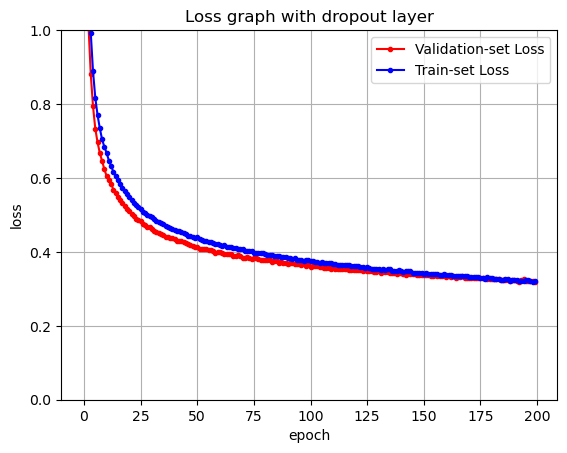

In [32]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph with dropout layer') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

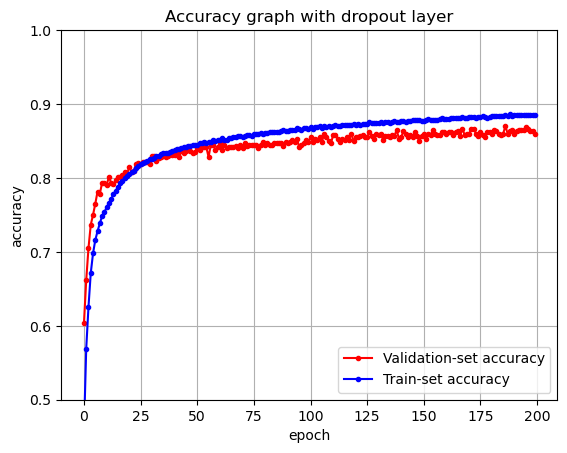

In [33]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph with dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

#### Dropout layer 하나만으로도 오버피팅을 막고, 두 데이터 셋이 정확도도 비슷하게 나옴을 확인 가능

---
## 4. Batch Normalization


**Batch Normalization은 gradient vanishing, explode 문제를 해결하는 방법**<br>
기존 z-score로 normalize하는 과정은 같지만, normalize 수식 **분모에 ϵ를 추가**하여 과정 도중 gradient가 사라지거나(vanishing) 폭등하는(explode)하는 것을 방지함.<br><br>

### 4-1. 아무것도 하지 않은 fully connected layer와 Batch Normalization layer를 추가한 두 실험을 비교 : fasion mnist 데이터셋

In [34]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist

In [35]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

#### 모델 구성(적용하지 않은 버전)

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.3, random_state=101)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/20
 9/21 [===========>..................] - ETA: 0s - loss: 1.6495 - accuracy: 0.4811

2022-09-18 20:33:14.740775: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 1s 18ms/step - loss: 1.2368 - accuracy: 0.6034 - val_loss: 0.7663 - val_accuracy: 0.7315
Epoch 2/20
16/21 [=====================>........] - ETA: 0s - loss: 0.6829 - accuracy: 0.7677

2022-09-18 20:33:15.153433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 0s 10ms/step - loss: 0.6703 - accuracy: 0.7729 - val_loss: 0.6097 - val_accuracy: 0.7981
Epoch 3/20
21/21 [==============================] - 0s 11ms/step - loss: 0.5652 - accuracy: 0.8114 - val_loss: 0.5417 - val_accuracy: 0.8196
Epoch 4/20
21/21 [==============================] - 0s 9ms/step - loss: 0.5145 - accuracy: 0.8294 - val_loss: 0.5091 - val_accuracy: 0.8252
Epoch 5/20
21/21 [==============================] - 0s 10ms/step - loss: 0.4857 - accuracy: 0.8361 - val_loss: 0.4830 - val_accuracy: 0.8368
Epoch 6/20
21/21 [==============================] - 0s 10ms/step - loss: 0.4657 - accuracy: 0.8447 - val_loss: 0.4651 - val_accuracy: 0.8409
Epoch 7/20
21/21 [==============================] - 0s 11ms/step - loss: 0.4473 - accuracy: 0.8478 - val_loss: 0.4532 - val_accuracy: 0.8454
Epoch 8/20
21/21 [==============================] - 0s 9ms/step - loss: 0.4303 - accuracy: 0.8553 - val_loss: 0.4385 - val_accuracy: 0.8507
Epoch 9/20
21/21 [========

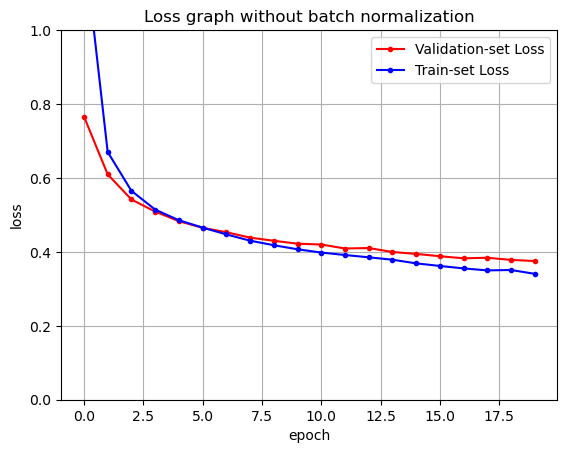

In [37]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

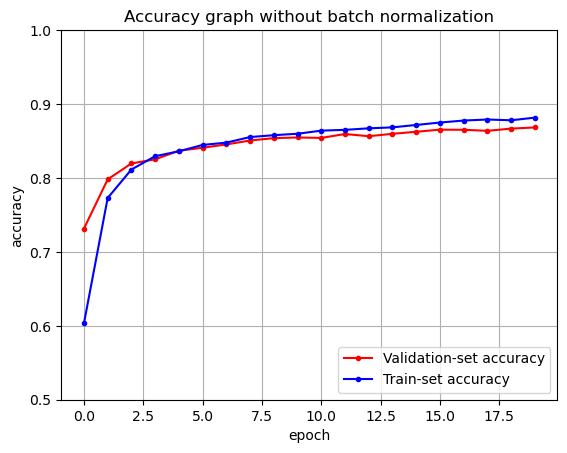

In [38]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1)
plt.title('Accuracy graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

#### Batch Normalization을 적용한 버전

In [39]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    #여기에 batchnormalization layer를 추가해보았습니다. 나머지 layer는 위의 실습과 같습니다.
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/20


2022-09-18 20:34:00.696494: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 1s 23ms/step - loss: 0.9577 - accuracy: 0.6797 - val_loss: 1.0835 - val_accuracy: 0.6513
Epoch 2/20
 7/21 [=========>....................] - ETA: 0s - loss: 0.5598 - accuracy: 0.8091

2022-09-18 20:34:01.482786: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 0s 12ms/step - loss: 0.5262 - accuracy: 0.8221 - val_loss: 0.8461 - val_accuracy: 0.7569
Epoch 3/20
21/21 [==============================] - 0s 11ms/step - loss: 0.4556 - accuracy: 0.8455 - val_loss: 0.7520 - val_accuracy: 0.7907
Epoch 4/20
21/21 [==============================] - 0s 13ms/step - loss: 0.4153 - accuracy: 0.8591 - val_loss: 0.6746 - val_accuracy: 0.8228
Epoch 5/20
21/21 [==============================] - 0s 12ms/step - loss: 0.3892 - accuracy: 0.8677 - val_loss: 0.6076 - val_accuracy: 0.8474
Epoch 6/20
21/21 [==============================] - 0s 11ms/step - loss: 0.3670 - accuracy: 0.8737 - val_loss: 0.5655 - val_accuracy: 0.8521
Epoch 7/20
21/21 [==============================] - 0s 11ms/step - loss: 0.3510 - accuracy: 0.8792 - val_loss: 0.5450 - val_accuracy: 0.8517
Epoch 8/20
21/21 [==============================] - 0s 11ms/step - loss: 0.3378 - accuracy: 0.8828 - val_loss: 0.5064 - val_accuracy: 0.8536
Epoch 9/20
21/21 [======

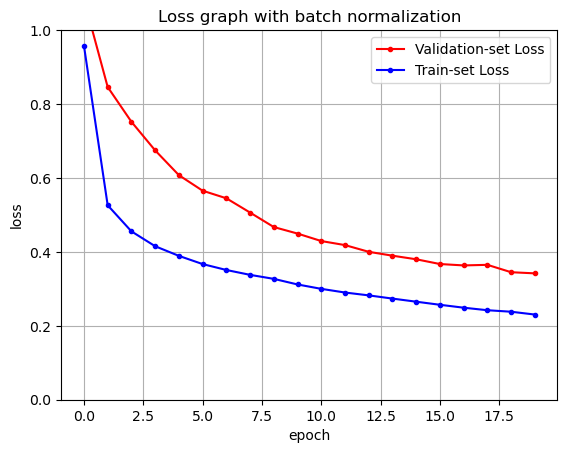

In [40]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph with batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

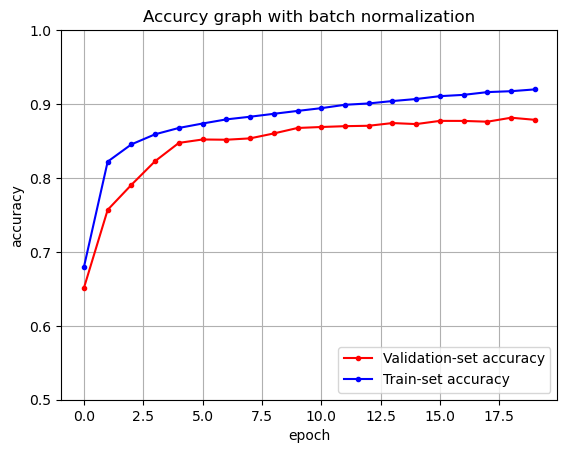

In [41]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accurcy graph with batch normalization') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

#### 기존의 fully connected layer도 낮지 않은 결과를 가져오지만, Batch Normalization을 추가하니 좀 더 빠르게 정확도 상승이 있음을 확인할 수 있음
또한 loss 함수의 감소도 더 빨라짐. 즉 Batch Normalization으로 인해 이미지가 정규화되면서 좀 더 고른 분포를 가지기도 하며 안정적인 학습이 가능.